#### Encode inputs into the amplitude of a vector using rotation encoding.

In [28]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *

import math 
import numpy as np
from random import randrange

In [29]:
def beta_j_s(j, s, alpha):
    num = math.sqrt(sum([alpha[(((2*j)-1)*(2**(s-1)))+l]**1 for l in range(1,2**(s-1)+1)]))
    den = math.sqrt(sum([alpha[((j-1)*(2**s))+l]**1 for l in range(1,2**s+1)]))
    return (2*math.asin(num/den) if num else 0)

alpha = [0]+[randrange(1,1000) for _ in range(16) ]
alpha = np.round(alpha/np.linalg.norm(alpha,1.0), 20)

num_qubits = int(np.ceil(np.log2(len(alpha))))
total_len = 2**num_qubits
alpha = np.append(alpha, [0]*(total_len-len(alpha)+1))
[np.sqrt(i) for i in alpha[1:]]


[0.2855049084407132,
 0.29031608809524484,
 0.12037943917739811,
 0.2580612937396559,
 0.12300620893841134,
 0.3086395811453015,
 0.3178242495407865,
 0.14743410075351407,
 0.29845990762988595,
 0.20901371761260013,
 0.29845990762988595,
 0.25326845854501234,
 0.1524091736304375,
 0.2681851633344242,
 0.2721292744913022,
 0.254527464440484,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

#### Calculate the rotation angles.

In [30]:
print (alpha, num_qubits)

h = {}

s = 1
for i in range(num_qubits):
    total = 2**(num_qubits-s)
    jlist = range(1, total+1)

    for j in jlist:
        h[(s,j)] = beta_j_s(j,s,alpha)
        print ((s,j), h[(s,j)])

    s += 1

QC = QuantumCircuit(num_qubits)
state = Statevector(QC)
state.draw(output="Latex")

[0.         0.08151305 0.08428343 0.01449121 0.06659563 0.01513053
 0.09525839 0.10101225 0.02173681 0.08907832 0.04368673 0.08907832
 0.06414491 0.02322856 0.07192328 0.07405434 0.06478423 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ] 5
(1, 1) 1.5875066160316627
(1, 2) 2.2686512465335094
(1, 3) 2.383092869903868
(1, 4) 0.8686820511897306
(1, 5) 1.2218646471339794
(1, 6) 1.407343466166
(1, 7) 2.108026268029322
(1, 8) 1.5039776219157277
(1, 9) 0
(1, 10) 0
(1, 11) 0
(1, 12) 0
(1, 13) 0
(1, 14) 0
(1, 15) 0
(1, 16) 0
(2, 1) 1.2205639374507093
(2, 2) 1.6238376475922978
(2, 3) 1.64239250061662
(2, 4) 1.758601483643994
(2, 5) 0
(2, 6) 0
(2, 7) 0
(2, 8) 0
(3, 1) 1.5421575619707517
(3, 2) 1.4706289056333366
(3, 3) 0
(3, 4) 0
(4, 1) 1.6107643458433085
(4, 2) 0
(5, 1) 0


<IPython.core.display.Latex object>

Beta  (5, 1) 0 Binary string :   0
Beta  (4, 1) 1 Binary string :  0 1.6107643458433085
Beta  (4, 2) 1 Binary string :  1 0
Beta  (3, 1) 2 Binary string :  00 1.5421575619707517
Beta  (3, 2) 2 Binary string :  01 1.4706289056333366
Beta  (3, 3) 2 Binary string :  10 0
Beta  (3, 4) 2 Binary string :  11 0
Beta  (2, 1) 3 Binary string :  000 1.2205639374507093
Beta  (2, 2) 3 Binary string :  001 1.6238376475922978
Beta  (2, 3) 3 Binary string :  010 1.64239250061662
Beta  (2, 4) 3 Binary string :  011 1.758601483643994
Beta  (2, 5) 3 Binary string :  100 0
Beta  (2, 6) 3 Binary string :  101 0
Beta  (2, 7) 3 Binary string :  110 0
Beta  (2, 8) 3 Binary string :  111 0
Beta  (1, 1) 4 Binary string :  0000 1.5875066160316627
Beta  (1, 2) 4 Binary string :  0001 2.2686512465335094
Beta  (1, 3) 4 Binary string :  0010 2.383092869903868
Beta  (1, 4) 4 Binary string :  0011 0.8686820511897306
Beta  (1, 5) 4 Binary string :  0100 1.2218646471339794
Beta  (1, 6) 4 Binary string :  0101 1.4073434

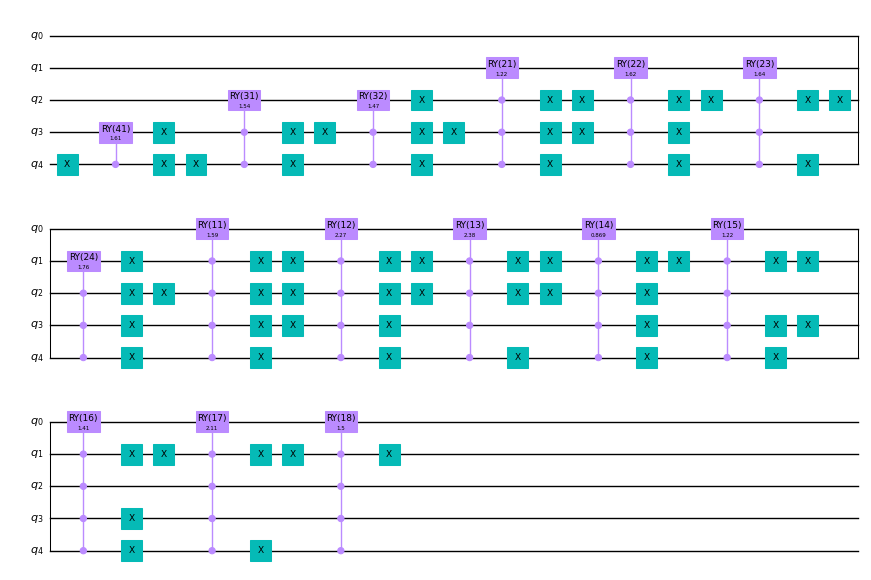

In [31]:
for wire in range(num_qubits, 0, -1):
    for j in range(1, 2**(num_qubits-wire)+1):
        bitstring = format(j-1, "#010b")[-(num_qubits-wire):] if wire != num_qubits else ""
        print ("Beta ", (wire,j),num_qubits-wire, "Binary string : ", bitstring, h[(wire,j)])
        control_wires = []
        
        if not h[(wire,j)]: 
            continue

        for i,b in zip(bitstring, range(wire, num_qubits)):
            if i == '0': 
                QC.x(b)
            control_wires.append(b)
                
        G = RYGate(h[(wire,j)], label="RY(" + str(wire) + str(j) + ")").control(len(control_wires)) if len(control_wires) else RYGate(h[(wire,j)])
        QC.append(G, control_wires + [wire-1])

        for i,b in zip(bitstring, range(wire, num_qubits)):
            if i == '0': 
                QC.x(b)

QC.draw(output='mpl', scale=0.5)

In [32]:
state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>